<a href="https://colab.research.google.com/github/joaoppadua/stj_reconhecimento_de_pessoas/blob/main/Mixed_methods_CUP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###CODE TO THE BOOK "USING MIXED METHODS IN FORENSIC DISCOURSE"

In [1]:
#Mount drive 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install git+https://github.com/felipemaiapolo/legalnlp

  Cloning https://github.com/felipemaiapolo/legalnlp to /tmp/pip-req-build-ixrusycu
  Running command git clone -q https://github.com/felipemaiapolo/legalnlp /tmp/pip-req-build-ixrusycu
     |████████████████████████████████| 64 kB 870 kB/s 
  Created wheel for legalnlp: filename=legalnlp-1.0.0-py3-none-any.whl size=11653 sha256=f2532b7e6cc083f52e6b7692fb0892c00b37f3c0f50b631d4a1a701803a3a6a5
  Stored in directory: /tmp/pip-ephem-wheel-cache-u4kujrnl/wheels/68/2c/bc/648c46b3bcdc01c929bb289ca6f2c514049437f74835d993f9
  Created wheel for ftfy: filename=ftfy-6.0.3-py3-none-any.whl size=41933 sha256=5efdf67a0128bb051b7839773f89ad53e33c1bb8e6dfb485e25639de2eaf2518
  Stored in directory: /root/.cache/pip/wheels/19/f5/38/273eb3b5e76dfd850619312f693716ac4518b498f5ffb6f56d
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9672 sha256=31ba3f9cb5a693b6a4640790c5e1e60710b5dd8be86ea5cf30a7e3d44b233c63
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca

In [4]:
!pip install empiricaldist

  Created wheel for empiricaldist: filename=empiricaldist-0.6.2-py3-none-any.whl size=10737 sha256=9c00253a7923cd40546a5f4a2aacd6ae632b23c1fa21dd8a40294ab4e234c5a8
  Stored in directory: /root/.cache/pip/wheels/34/22/5f/9ba9db604d08670e283b2e04551dd407f44cf889fdb9617ce5
Successfully built empiricaldist


In [5]:
#imports 
import nltk
import pandas as pd
from collections import Counter
#from nltk.lm import MLE
from matplotlib import pyplot as plt
from legalnlp import *
import os
from nltk import FreqDist, ConditionalFreqDist

In [6]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

Getting and preparing the data: 

In [7]:
DATA_PATH = 'drive/MyDrive/coding/python/local_repo/stj reconhecimento de pessoas'
DATA_FILE = 'corpus_stj_art_226.txt'

In [8]:
with open(os.path.join(DATA_PATH, DATA_FILE), 'r', encoding='utf-8') as f:
  data_raw = f.read()

In [9]:
from legalnlp.clean_functions import clean
data_clean = clean(data_raw)
type(data_clean)

str

In [10]:
from nltk import RegexpTokenizer
tokens = RegexpTokenizer(r'\w+').tokenize(data_clean)

In [11]:
tokens[:50]

['agravo',
 'regimental',
 'no',
 'habeas',
 'corpus',
 'processual',
 'penal',
 'roubo',
 'circunstanciado',
 'insurgência',
 'contra',
 'acórdão',
 'transitado',
 'em',
 'julgado',
 'manejo',
 'do',
 'writ',
 'como',
 'revisão',
 'criminal',
 'descabimento',
 'art',
 'numero',
 'inciso',
 'i',
 'alínea',
 'e',
 'da',
 'constituição',
 'federal',
 'ausência',
 'de',
 'manifesta',
 'ilegalidade',
 'insurgência',
 'quanto',
 'à',
 'autoria',
 'delitiva',
 'participação',
 'do',
 'agravante',
 'na',
 'prática',
 'do',
 'crime',
 'reconhecida',
 'pelas',
 'instâncias']

Now let's count the raw data and compare it to the clean data.

In [12]:
raw_tokens = nltk.word_tokenize(data_raw)
len(raw_tokens), len(tokens)

(22152, 18769)

And lets create a unigram and a bigram generator for the dataset.

In [13]:
fdist = FreqDist(tokens)
fdist.max(), fdist[fdist.max()], fdist.N(), fdist.freq(fdist.max())

('de', 907, 18769, 0.04832436464382759)

In [14]:
bgrams = [bgram for bgram in nltk.bigrams(tokens)]
type(bgrams)

list

In [15]:
cfdist = ConditionalFreqDist(bgrams)
len(cfdist), cfdist['reconhecimento'].max()

(2324, 'pessoal')

In [16]:
cfdist['reconhecimento'].freq('pessoal')

0.362962962962963

Now, let's create a function to generate a probability distribution for second words, given a prior word in a bigram.

In [17]:
from empiricaldist import Pmf

def bigram_pmf(cond_freq_dist, prior_word):
  ps_l = []
  qs_l = [w for w in cond_freq_dist[prior_word]]
  for i in qs_l:
    p = cond_freq_dist[prior_word].freq(i)
    ps_l.append(p)
  pmf = Pmf(ps_l, qs_l)
  return pmf



And let's generate a Pmf object, and than sort it in descending order. 

In [18]:
reconhecimento = bigram_pmf(cfdist, 'reconhecimento')

In [30]:
reconhecimento.sort_values(ascending=False)[:20]

pessoal        0.362963
fotográfico    0.318519
do             0.125926
de             0.044444
da             0.022222
por            0.022222
fls            0.007407
art            0.007407
foi            0.007407
e              0.007407
ratificado     0.007407
judicial       0.007407
disposições    0.007407
comprovação    0.007407
feito          0.007407
operado        0.007407
não            0.007407
já             0.007407
deu            0.007407
na             0.007407
Name: , dtype: float64

Let's plot this:

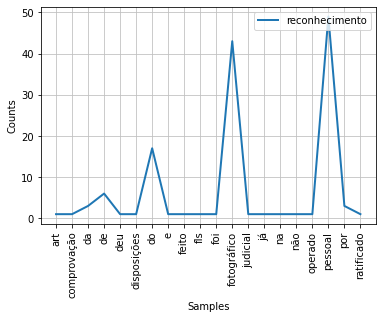

In [20]:
cfdist.plot(conditions=['reconhecimento'], cumulative=False)

Not only does it seems consistent with [Zipf's Law](https://en.wikipedia.org/wiki/Zipf%27s_law), but it also shows that "reconhecimento" heavily conditions "fotográfico" and "pessoal" as next words, even over formal words, such as variations of possessive determiners derived from "de".


A conditional probaiblity-based N-gram language model uses the adaptation of Bayes' Theorem for word counts, as follows:

\begin{equation}
    P(word_{2}\mid word_{1}) = \frac{C(word_{1}, word_{2})}{C(word_{1})} \tag{1}
  \end{equation}

where $C$ meis the count of the word or bigram. In other words, the probability of a second word is calculated by the count of the bigram, normalized by the count of the first word. 

Now, for the sake of it, let's construct a probability distribution of lexical items--i.e., of unigrams.

In [26]:
def unigram_pmf(freq_dist):
  qs_l = [w for w in freq_dist]
  ps_l = [freq_dist.freq(w) for w in freq_dist]
  pmf = Pmf(ps_l, qs_l)
  return pmf

In [27]:
unigram_dist = unigram_pmf(fdist)

In [31]:
unigram_dist.sort_values(ascending=False)[:20]

de                0.048324
numero            0.044062
do                0.033033
a                 0.031861
o                 0.022377
da                0.019820
em                0.019394
não               0.018861
que               0.016730
no                0.015984
e                 0.013426
se                0.009377
penal             0.008738
data              0.007779
para              0.007726
na                0.007246
reconhecimento    0.007193
agravo            0.006820
art               0.006180
recurso           0.005541
Name: , dtype: float64

And let's check the count and probability of some key lexical items;


In [38]:
lexical_l = ['roubo', 'homicídio', 'tráfico', 'estupro', 'corrupção', 'sonegação']
lexical_d = {}

for i in lexical_l:
  lexical_d[i] = (fdist[i], fdist.freq(i))


In [39]:
df_lexical_items = pd.DataFrame(lexical_d, index=['Count', 'Probability'])
df_lexical_items

,roubo,homicídio,tráfico,estupro,corrupção,sonegação
Count,46.000000,6.00000,5.000000,4.000000,3.00000,0.0
Probability,0.002451,0.00032,0.000266,0.000213,0.00016,0.0


As we can see, roubo is the indisputable king of references in the corpus, in what regards names of crimes. Corrupção is about 15 times less likely to come up. And a typical financial crime--tax evasion--doesn't occur at all. 